In [18]:
import xspec as xs
import os
import numpy as np
import pylab as pl

import matplotlib 
pl.rcParams['figure.figsize'] = (8, 6.0)
pl.rcParams['font.size'] = 23
#pl.rcParams['font.family'] = 'sans-serif'
pl.rcParams['axes.linewidth'] = 1.5 #set the value globally

matplotlib.rcParams['font.family'] = 'CMU Sans Serif'



In [32]:
xs.AllData.clear()
os.chdir("/Users/jmsantander/nustar/data/bzb/products/")
xs.AllData += "outspectra_90501658002.grp"


In [33]:
#xs.Plot.setRebin(3, 10)
xs.Plot.xAxis = "keV"
xs.Plot.yLog = True


xs.AllData.ignore("0.0-3.0 50.0-**")
xs.AllData.ignore("bad")
m1 = xs.Model("phabs*powerlaw")

In [34]:
comp1 = m1.phabs
comp2 = m1.powerlaw

# Freezing nH
# https://heasarc.gsfc.nasa.gov/cgi-bin/Tools/w3nh/w3nh.pl?Entry=1RXS+J223249.5-202232&NR=GRB%2FSIMBAD%2BSesame%2FNED&CoordSys=Equatorial&equinox=2000&radius=0.1&usemap=0
par1 = m1.phabs.nH
par1.values = 3.33e-2
par1.frozen = True

xs.Fit.nIterations = 1000
xs.Fit.statMethod = "cstat"
xs.Fit.statTest = "chi"
xs.Fit.perform()

In [35]:
xs.Plot.device = "/xw"
#xs.Plot("data","model","resid")
xs.Plot("eeufspec","resid") # E^2 F(E)
#xs.Plot("ufspec","resid")



3.0600 0.0200 2.9358E-12 5.9721E-13
3.1400 0.0600 2.5802E-12 3.2034E-13
3.2600 0.0600 2.4769E-12 3.0492E-13
3.3600 0.0400 2.6222E-12 3.7589E-13
3.4800 0.0800 2.5426E-12 2.5878E-13
3.6000 0.0400 2.6045E-12 3.6275E-13
3.6800 0.0400 2.3423E-12 3.4349E-13
3.7800 0.0600 2.4326E-12 2.8508E-13
3.8800 0.0400 2.3815E-12 3.3931E-13
4.0000 0.0800 2.4408E-12 2.5043E-13
4.1200 0.0400 3.1098E-12 3.8235E-13
4.2200 0.0600 2.2627E-12 2.7470E-13
4.3200 0.0400 2.2387E-12 3.3242E-13
4.4000 0.0400 2.0978E-12 3.2258E-13
4.5000 0.0600 2.2733E-12 2.8009E-13
4.6200 0.0600 2.3478E-12 2.8715E-13
4.7400 0.0600 2.1664E-12 2.7609E-13
4.8400 0.0400 2.3670E-12 3.4514E-13
4.9200 0.0400 2.8956E-12 3.8982E-13
5.0200 0.0600 2.2617E-12 2.9408E-13
5.1600 0.0800 2.1201E-12 2.4915E-13
5.2800 0.0400 2.2922E-12 3.5722E-13
5.4000 0.0800 1.9539E-12 2.4220E-13
5.5600 0.0800 2.1923E-12 2.5839E-13
5.6800 0.0400 2.9076E-12 4.2192E-13
5.7600 0.0400 2.8854E-12 4.1181E-13
5.8600 0.0600 2.6665E-12 3.3863E-13
5.9800 0.0600 2.6219E-12 3.3

Text(0, 0.5, '$E^2 F(E)$ [erg cm$^{-2}$ s$^{-1}$]')

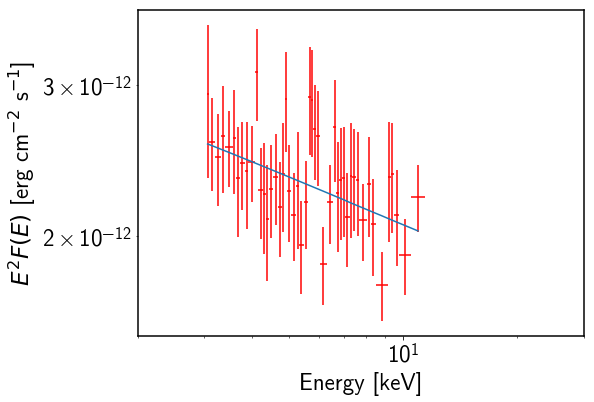

In [36]:
keV = 1.60218e-9 # keV to erg

# Get coordinates from plot:
energies = xs.Plot.x() # in keV
nuFnu = np.array(xs.Plot.y()) * keV # in erg cm^-2 s^-1
dE = np.array(xs.Plot.xErr())
dnuFnu = np.array(xs.Plot.yErr()) * keV 


unfolded = xs.Plot.model()
# Plot using Matplotlib:
pl.errorbar(energies, nuFnu, xerr=dE, yerr=dnuFnu,marker='', linestyle='', color='red')
pl.plot(energies, np.array(unfolded)*keV)

outfile = open("1rxs_sed.dat", "w")
outfile.write("#Emid dE nuFnu dnuFnu\n")

for (ec, f, dec, df) in zip(energies, nuFnu, dE, dnuFnu):
    line = "{:.4f} {:.4f} {:.4E} {:.4E}".format(ec, dec, f, df)
    print(line)
    outfile.write(line + "\n")
    
outfile.close()

xs.AllModels.calcFlux("5.0 10.0 err")
flux = list(xs.AllData(1).flux)
print("Energy flux (5-10 keV): {:.3E} erg/cm^2/s ({:.3E} - {:.3E} 68% range)".format(flux[0], flux[1], flux[2]))


## From SED Builder
#h = 4.135667696e-18 # Hz to keV
#FMPA = np.genfromtxt("/Users/jmsantander/nustar/1RXS/A.txt")
#pl.errorbar(FMPA[:,0] * h, FMPA[:,2], xerr=FMPA[:,1] * h, yerr=FMPA[:,3], linestyle='', alpha=0.2)
#FMPB = np.genfromtxt("/Users/jmsantander/nustar/1RXS/B.txt")
#pl.errorbar(FMPB[:,0] * h, FMPB[:,2], xerr=FMPB[:,1] * h, yerr=FMPB[:,3], linestyle='', alpha=0.2)

pl.xscale('log')
pl.yscale('log')

#pl.ylim(1e-13, 3e-12)
pl.xlim(2,30)

pl.xlabel('Energy [keV]')
pl.ylabel('$E^2 F(E)$ [erg cm$^{-2}$ s$^{-1}$]')